### Trying to figure out how to fit a diel sine curve to the oxygen (and chl fluor, and beam attenuation) data from CTD casts.

Trying out the following randam noisy data generator with numpy/pylab least squares sine modeling guesses at the equation parameters:

https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy

In case of fitting a sin function, the 3 parameters to fit are:

- offset ('a')
- amplitude ('b')
- phase ('c'). 

I think that I can just look at the plotted data and make a decent guess at these (maybe not the phase shift...). I don't see why guessing a phase shift of 0 won't be fine for our purposes.

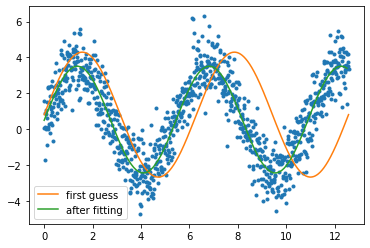

In [6]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [9]:
cd

/home/millieginty


In [11]:
np.loadtxt('~/Documents/git-repos/2017-etnp/analyses/flux/DO.csv')

OSError: ~/Documents/git-repos/2017-etnp/analyses/flux/DO.csv not found.

### Ok, now trying to use my own CTD oxygen data from ETNP Station P2, April 2018 